<a href="https://colab.research.google.com/github/camilamon123/Estocasticos/blob/main/TP_Estoca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulación de muestras de una distribución normal** \\
(a) Utilizando la transformación de Box Muller, genero dos variables uniformes $U_1$ y $U_2$.
\
Para lo que utilizo las siguientes transformaciónes:
\begin{align*}
  Z_1 = \sqrt{-2\ln(U_1)}\cos(2\pi U_2)\\
  Z_2 = \sqrt{-2\ln(U_1)}\sin(2\pi U_2)
\end{align*}

(c) Genero tres variables aleatorias normales usando la transformación de Box Muller, siendo $X_1$, $X_2$ y $X_3$ las nuevas V.As

Media de Z_1: -0.01842625000612092, Varianza de Z_1: 0.9919489929784951
Media de Z_2: 0.006972350181818115, Varianza de Z_2: 1.0071738788050948
Coeficiente de correlación de Pearson: [[1.         0.00899089]
 [0.00899089 1.        ]]


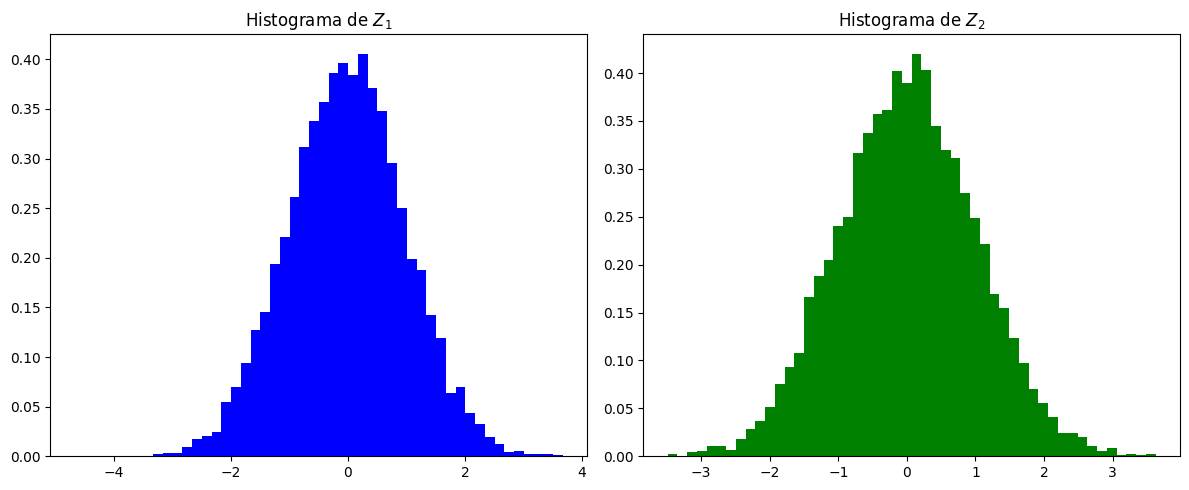

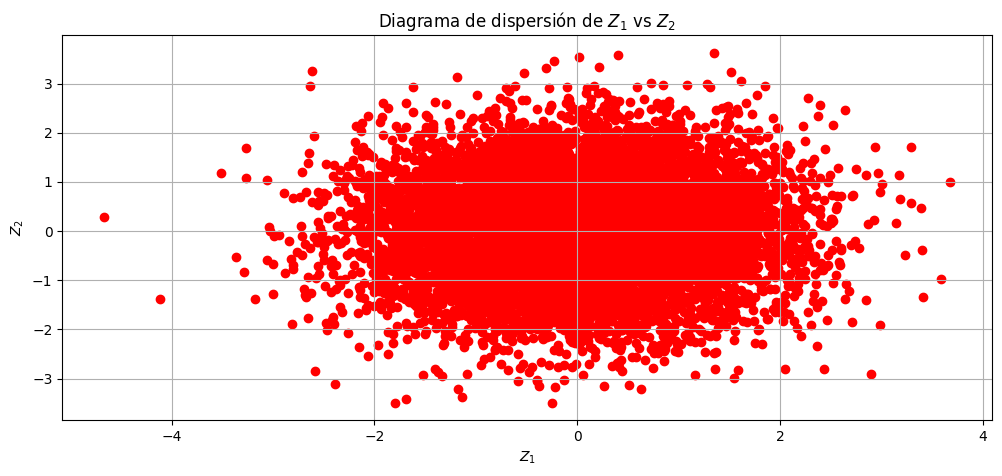

Media de X_1: -0.026058652662333537, Varianza de X_1: 1.983897985956991
Media de X_2: 1.0098603921887415, Varianza de X_2: 2.0143477576101896
Media de X_3: 0.9631474999877583, Varianza de X_3: 3.9677959719139806


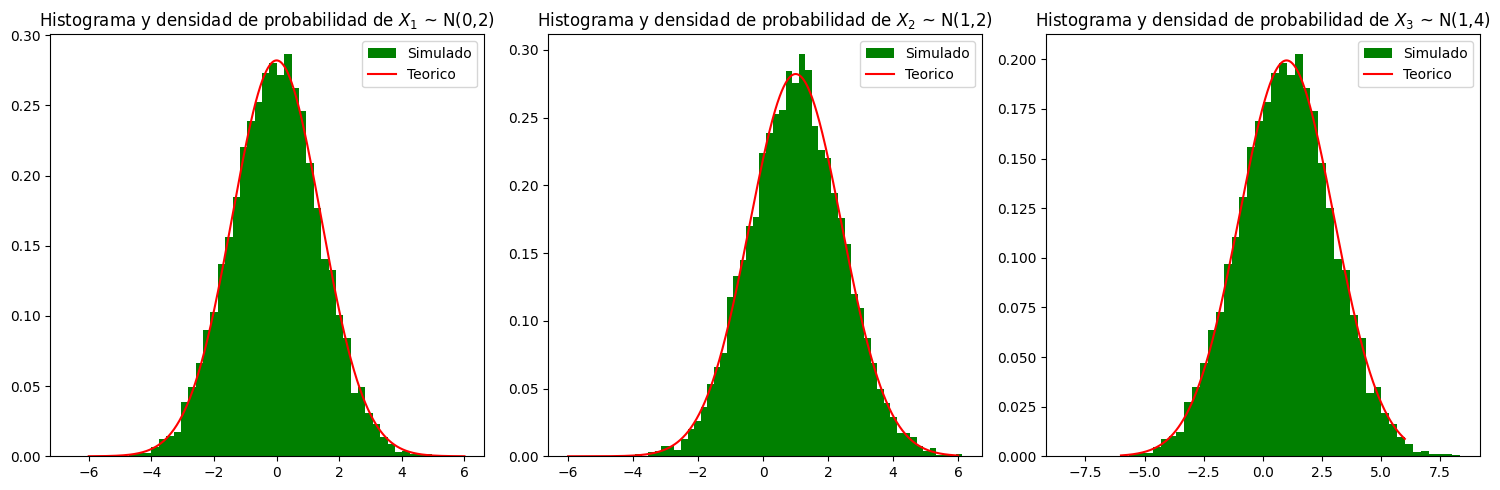

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 10000 #Cantidad de muestras para ambas variables
pi = np.pi # Número pi

#Variables uniformes U_1 y U_2
U_1 = np.random.uniform(0,1,N)
U_2 = np.random.uniform(0,1,N)

#Genero las variables Z_1 y Z_2 a partir de la trasnformación de Box Muller
Z_1 = np.sqrt(-2 * np.log(U_1) ) * np.cos(2 * pi * U_2)
Z_2 = np.sqrt(-2 * np.log(U_1) ) * np.sin(2 * pi * U_2)

#Media  y varianza de Z_1 y Z_2
media_z1,var_z1  = np.mean(Z_1), np.var(Z_1)
media_z2,var_z2  = np.mean(Z_2),np.var(Z_2)

#Imprimo los respectivos valores de la varianza y esperanza
print(f'Media de Z_1: {media_z1}, Varianza de Z_1: {var_z1}')
print(f'Media de Z_2: {media_z2}, Varianza de Z_2: {var_z2}')

#Coeficiente de correlación de Pearson
correlacion = np.corrcoef(Z_1,Z_2)
print(f'Coeficiente de correlación de Pearson: {correlacion}')

#Histogramas
bins = 50 #A medida que aumento los bins el gráfico se va distorsionando, aunque no pierde la "esencia" de la normal
plt.figure(figsize=(12, 5))

#Para Z_1
plt.subplot(1,2,1)
plt.hist(Z_1, bins, density = True, color = 'b')
plt.title(f'Histograma de $Z_1$')

#Para Z_2
plt.subplot(1,2,2)
plt.hist(Z_2, bins, density = True, color = 'g')
plt.title(f'Histograma de $Z_2$')

plt.tight_layout()
plt.show()

#Gráfico de dispersion Z_1 vs Z_2
plt.figure(figsize=(12, 5))

plt.scatter(Z_1,Z_2, color = 'r')
plt.title(f'Diagrama de dispersión de $Z_1$ vs $Z_2$')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)
plt.show()

#---------------------------item c--------------------------------

#Genero las nuevas variables X_1, X_2 y X_3

X_1 = np.sqrt(2) * Z_1 #N(0,2)
X_2 = 1 + np.sqrt(2) * Z_2 #N(1,2)
X_3 = 1 + 2 * Z_1 #N(1,4)

#Esperanza  y varianza de cada variable
media_x1, var_x1 = np.mean(X_1), np.var(X_1)
media_x2,var_x2  = np.mean(X_2), np.var(X_2)
media_x3, var_x3 = np.mean(X_3), np.var(X_3)

#Imprimo los valores de esperanza y varianza
print(f'Media de X_1: {media_x1}, Varianza de X_1: {var_x1}')
print(f'Media de X_2: {media_x2}, Varianza de X_2: {var_x2}')
print(f'Media de X_3: {media_x3}, Varianza de X_3: {var_x3}')

#Densidad teorica
eje_x = np.linspace(-6,6,1000)
x1_pdf = norm.pdf(eje_x, 0, np.sqrt(2)) #N(0,2)
x2_pdf = norm.pdf(eje_x, 1, np.sqrt(2)) #N(1,2)
x3_pdf = norm.pdf(eje_x, 1,2) #N(1,4)

#Histograma de cada variable con su densidad de probabilidad respectiva
plt.figure(figsize=(15, 5))

#Para X_1
plt.subplot(1,3,1)
plt.hist(X_1, bins, density = True, color = 'g', label = 'Simulado')
plt.plot(eje_x, x1_pdf, color ='r', label = 'Teorico')
plt.title(f'Histograma y densidad de probabilidad de $X_1$ ~ N(0,2)')
plt.legend()

#Para X_2
plt.subplot(1,3,2)
plt.hist(X_2, bins, density = True, color = 'g', label = 'Simulado')
plt.plot(eje_x, x2_pdf,color = 'r', label = 'Teorico')
plt.title(f'Histograma y densidad de probabilidad de $X_2$ ~ N(1,2)')
plt.legend()

#Para X_3
plt.subplot(1,3,3)
plt.hist(X_3, bins, density = True, color = 'g', label = 'Simulado')
plt.plot(eje_x, x3_pdf,color='r', label = 'Teorico')
plt.title(f'Histograma y densidad de probabilidad de $X_3$ ~ N(1,4)')
plt.legend()

plt.tight_layout()
plt.show()







**Resolución de integrales**\
Siendo X una variable aleatoria normal de media 2 y varianza 3, calculo:\
(a)  $\mathbb{P}(\mu - \sigma < X < \mu + \sigma)$, con N = 10000\
(b)  $\mathbb{P}(\mu - 2\sigma < X < \mu + 2\sigma)$, con N = 10000\
(c) $\mathbb{P}(\mu - 3\sigma < X < \mu + 3\sigma)$, con N = 10000\
(d) $\mathbb{P}(\mu - \sigma < X < \mu + \sigma)$ para N= $10,10^2, 10^3, 10^4, 10^5,10^6$

Probabilidad de (a) : 0.6826 para 10000 muestras
Probabilidad de (b) : 0.9521 para 10000 muestras
Probabilidad de (c) : 0.9969 para 10000 muestras
Probabilidad de (d) : 0.6 para 10 muestras
Probabilidad de (d) : 0.77 para 100 muestras
Probabilidad de (d) : 0.676 para 1000 muestras
Probabilidad de (d) : 0.6737 para 10000 muestras
Probabilidad de (d) : 0.68237 para 100000 muestras
Probabilidad de (d) : 0.68183 para 1000000 muestras


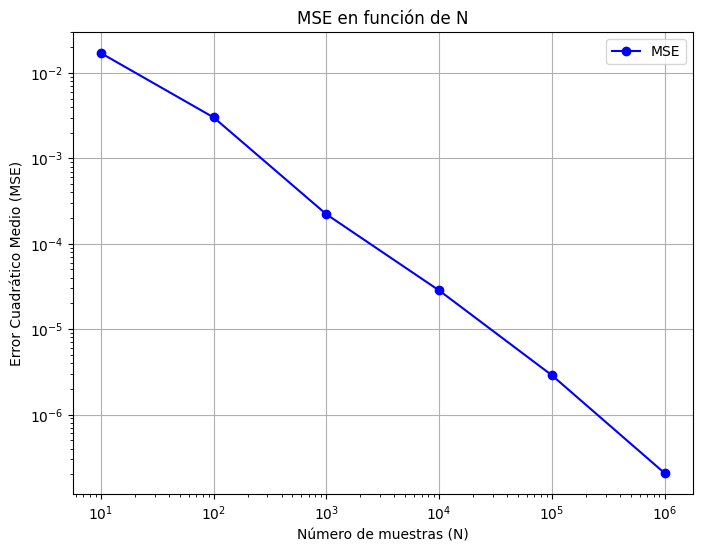

In [73]:
import numpy as np
import matplotlib.pyplot as plt

mu = 2 #media de la variable X
sigma = np.sqrt(3) # desviación estandar, sigma^2 = varianza de X
M = 50 #realizaciones
I = 0.682687273250961 #Valor teorico supuesto de la integral
N = 10000 #cant. de muestras

#Función para calcular la prob de los diferentes casos
def prob(N, mu, sigma, multiplicidad, item = None):
    muestras = np.random.normal(mu,sigma,N) #Genera N muestras normales
    probabilidad = np.mean((muestras > (mu - multiplicidad*sigma)) & (muestras < (mu + multiplicidad*sigma)))  #la expresion booleana calcula cuantas de las muestras caen en ese intervalo
    #mientras que el mean() calcula la proporcion de esos valores dando como resultado una probabilidad
    if item:
      print(f'Probabilidad de ({item}) : {probabilidad} para {N} muestras')
    return probabilidad

#Calculo de prob. e imprimo esos valores
prob_a, prob_b, prob_c = prob(N,mu,sigma,1, 'a'), prob(N,mu,sigma,2,'b'), prob(N,mu,sigma,3,'c')

#Comparacion de resultados mediante el error cuadratico medio del caso (d)
d_muestras = [10,100,1000,10000,100000,1000000] #vector de cant. de muestras
mse_valores= [] #almacena los valores del MSE para cada uno de los tamaños de muestra N

for N in d_muestras:
  prob_d = prob(N, mu,sigma,1,'d')
  estimaciones = np.zeros(M) #Aca se guardan las probabilidad estimadas en cada realizacion
  for i in range(M): # M realizaciones para cada valor de N
    prob_d = prob(N,mu,sigma,1) #prob
    estimaciones [i]= prob_d

  # Convertir a array para hacer cálculos
  estimaciones = np.array(estimaciones)

  # Cálculo del MSE: promedio de (estimacion - valor_teorico)^2
  mse = np.mean((estimaciones - I) ** 2)
  mse_valores.append(mse) #el append agrega el mse calculado al vector de mse_valores


# Convertir mse_valores a un array de numpy
mse_valores = np.array(mse_valores)

# Graficar el MSE en función del número de muestras N
plt.figure(figsize=(8, 6))
plt.loglog(d_muestras, mse_valores, marker='o', linestyle='-', color='b', label='MSE')
plt.xlabel('Número de muestras (N)')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('MSE en función de N')
plt.grid(True)
plt.legend()
plt.show()




